<a href="https://colab.research.google.com/github/KanoonGammy/Python-for-investing/blob/All/1_Project_SMA_2SD_Bollinger_Bands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install mplfinance

In [ ]:
import mplfinance as mpf
import pandas as pd
import yfinance as yf
import datetime

In [ ]:
#ทำ SMA 2SD Bollinger Bands
data = yf.download('PTT.BK' ,interval = '1h' ,start = datetime.datetime.now() - datetime.timedelta(729) , end = datetime.datetime.now())

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = data

In [ ]:
#Create MA 50
df['sma_50'] = df['Close'].rolling(50).mean()

In [ ]:
#Create SD
df['sma_50SD'] = df['Close'].rolling(50).std()

In [ ]:
#Create Bands
Multi_sd = float(input())
df["upper_bands"] = df['sma_50'] + (Multi_sd * df['sma_50SD'] )
df["lower_bands"] = df['sma_50'] - (Multi_sd * df['sma_50SD'] )

2.0


/usr/local/lib/python3.8/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


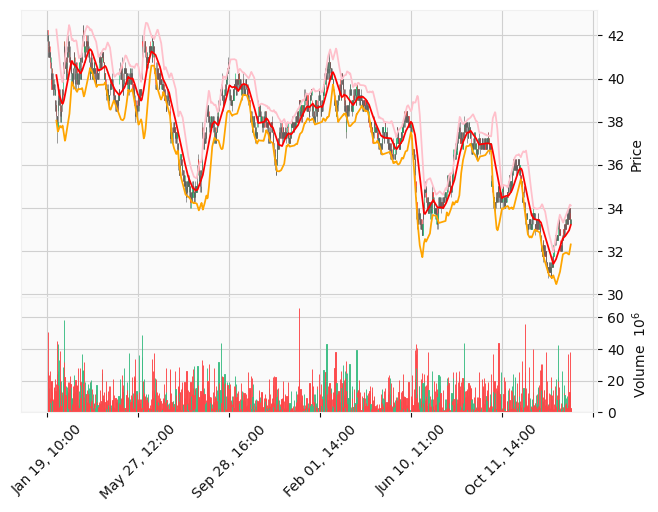

In [ ]:
#plot
upper_bands = mpf.make_addplot(df['upper_bands'] , type = 'line' , color = 'pink')
lower_bands = mpf.make_addplot(df['lower_bands'] , type = 'line' , color = 'orange')
sma_50 = mpf.make_addplot(df['sma_50'], type = 'line' , color = 'red')

adds = [upper_bands , lower_bands , sma_50]

mpf.plot(data = df , type = 'candle' , style = 'yahoo' , volume = True, addplot = adds)

In [ ]:
def all(ticker , ma_length , sd_multi ,interval = '1d', backward_days = 729 , volume = False):
  df = yf.download(ticker ,interval = interval ,start = datetime.datetime.now() - datetime.timedelta(backward_days) ,
                   end = datetime.datetime.now())
  df['sma_50'] = df['Close'].rolling(ma_length).mean()
  df['sma_50SD'] = df['Close'].rolling(ma_length).std()
  df["upper_bands"] = df['sma_50'] + (sd_multi * df['sma_50SD'] )
  df["lower_bands"] = df['sma_50'] - (sd_multi * df['sma_50SD'] )

  upper_bands = mpf.make_addplot(df['upper_bands'] , type = 'line' , color = 'pink')
  lower_bands = mpf.make_addplot(df['lower_bands'] , type = 'line' , color = 'orange')
  sma_50 = mpf.make_addplot(df['sma_50'], type = 'line' , color = 'red')

  adds = [upper_bands , lower_bands , sma_50]

  plot = mpf.plot(data = df , type = 'candle' , style = 'yahoo' , volume = volume, addplot = adds)
  return plot

[*********************100%***********************]  1 of 1 completed


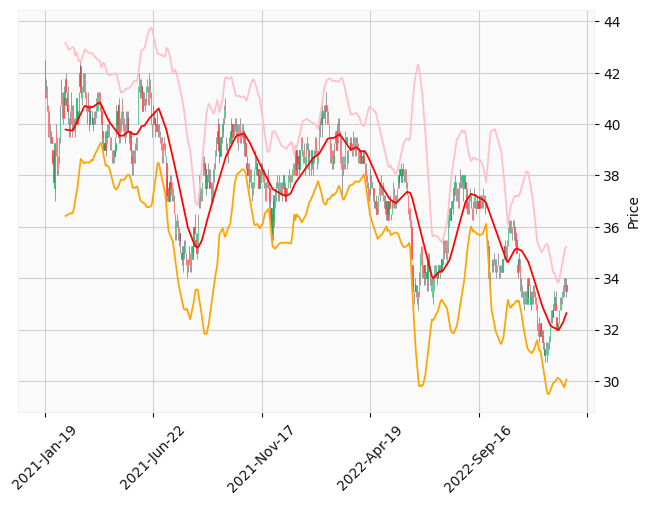

In [ ]:
all('PTT.BK' , 20 , 3.0 , interval = '1d')